In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%%time
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

CPU times: total: 46.9 ms
Wall time: 17.2 s


In [30]:
df=pd.read_csv("mcdonalds.csv")

In [31]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [33]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [34]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [76]:
df['Like'].value_counts()

Like
+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

In [77]:
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [78]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [79]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

## EDA

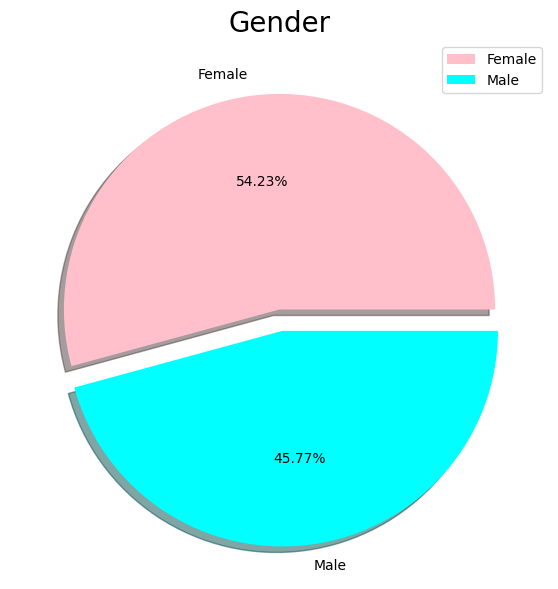

In [35]:
#EXPLORING DATA

#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

     Age
Age  1.0


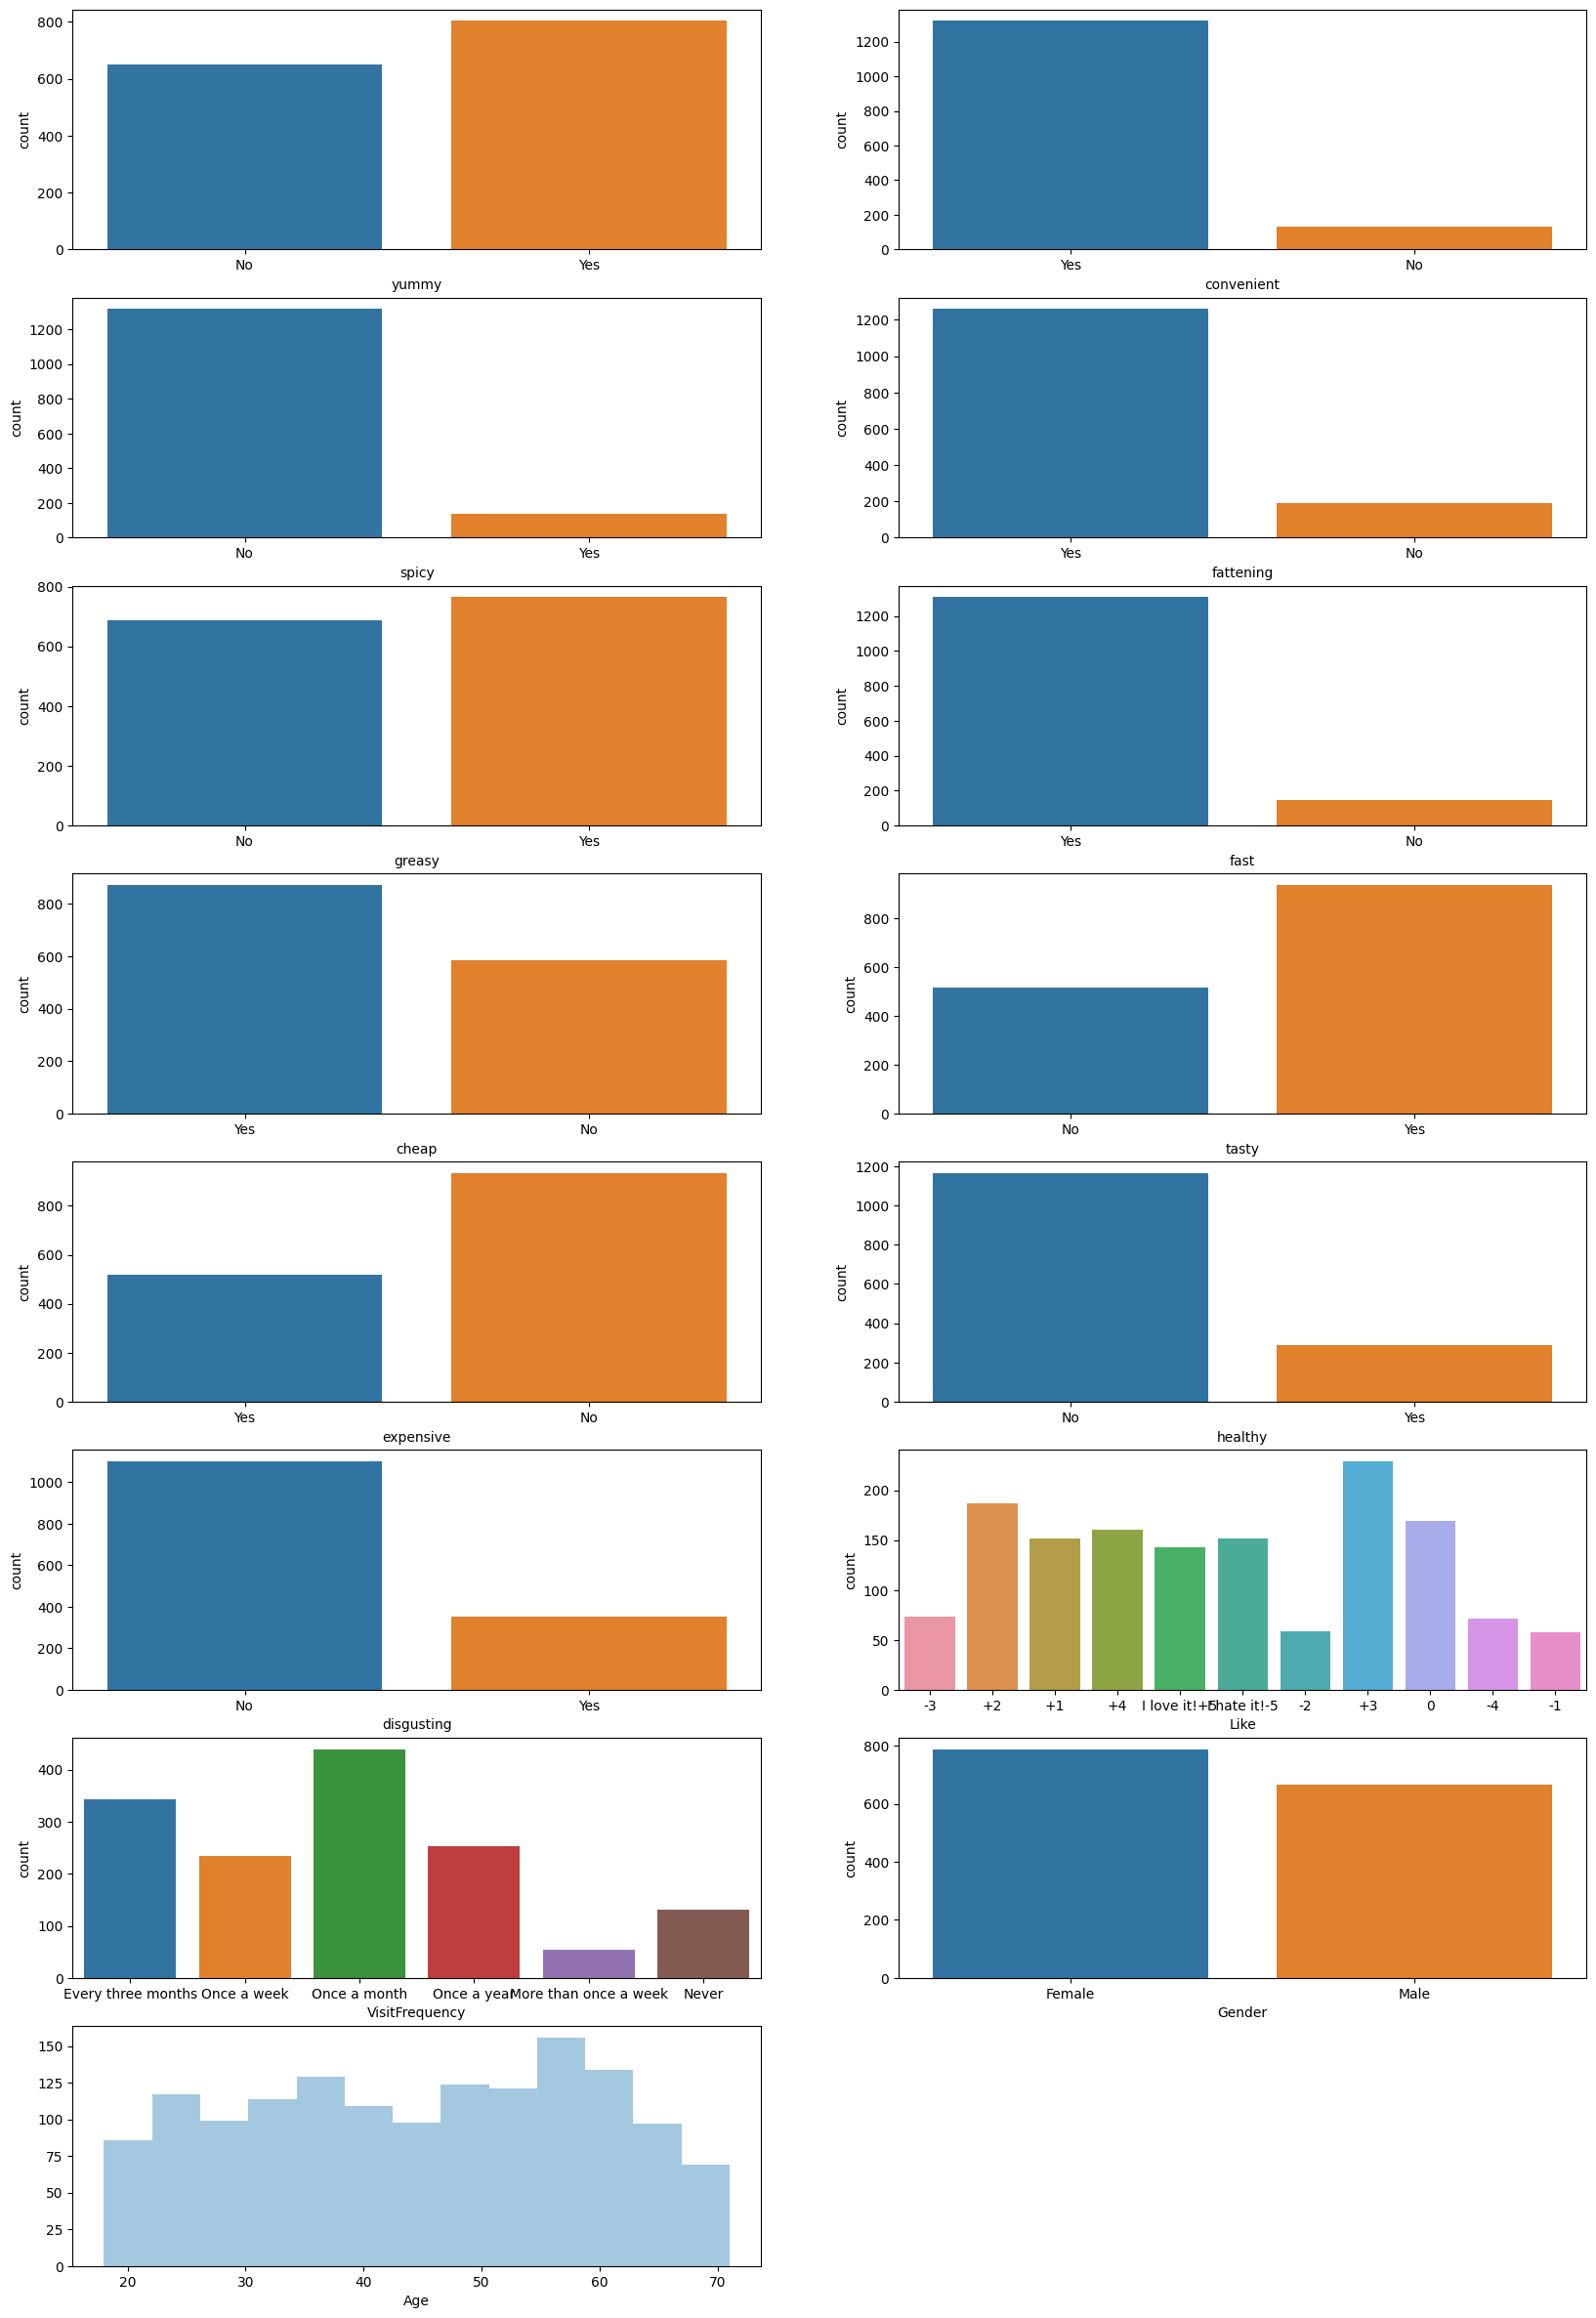

In [36]:
import seaborn as sns
def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=df, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(df[i].dropna(), kde=False)  # Exclude missing values

    print(df[con].corr())

# Applying the function on the dataset
EDA(df, (20, 30))

## inferences
1.There are more females than males.

2.Most of the people visit once a month.

3.Very less people visit more than once a week.

4.Nearly 800 people has told that food is yummy.

5.Most people has termed eating at mcdonalds as less expensive.

6.Close to 1100 people has termed the food at mcdonalds as not healthy.

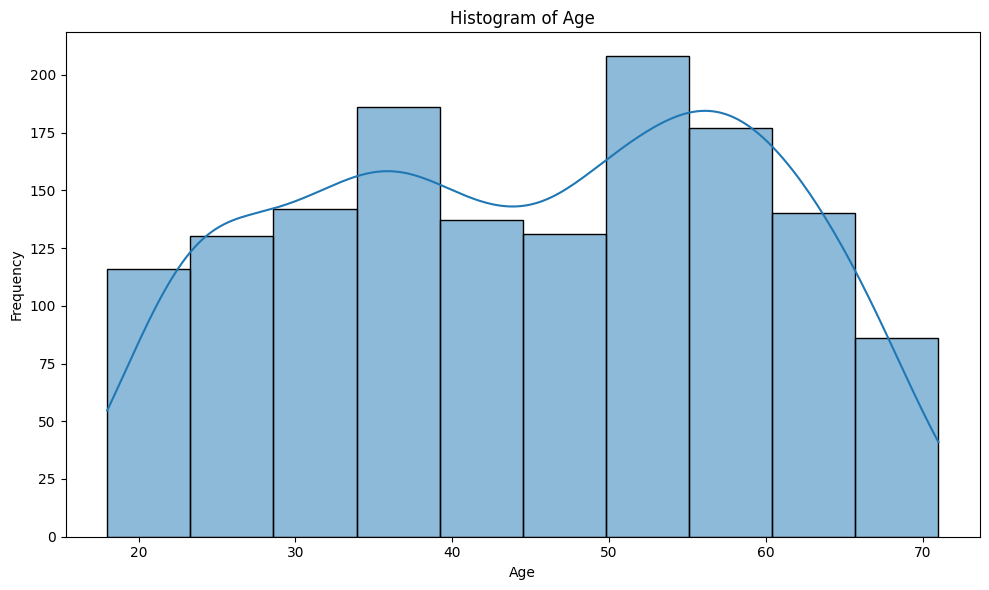

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))


sns.histplot(df['Age'], bins=10, kde=True)  # Change 'Age' if your column name is different
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

1.There are 54.23% female and 45.77% male in the dataset.

2.There are over 50 people aged 53 that are customer and these are most no. of customers in any age group.

3.The least age group of people that prefers eating at mcDonalds is 71.

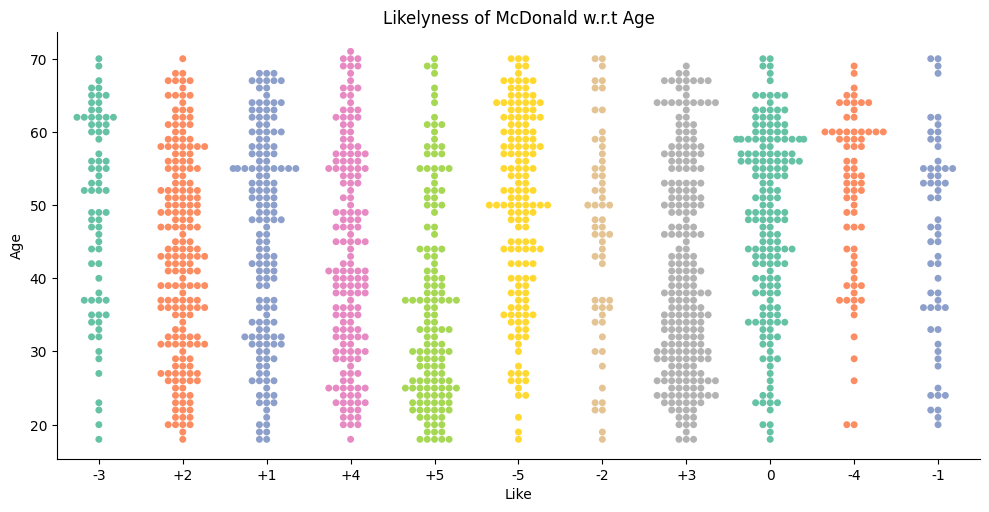

In [38]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()
     

## Data Preprocessing

->'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting': These seem to be categorical (Yes/No) responses.

->'Like': It has numerical values such as -3, +2, etc., which likely represent a rating or preference score.

->'Age': This is a numerical column.

->'VisitFrequency': This contains frequency descriptions (e.g., "Every three months", "Once a week").

->'Gender': Contains categorical data (e.g., "Male", "Female").

In [39]:
td = df.iloc[:, 0:11].apply(lambda col: col.map({"Yes": 1, "No": 0}))


## Using PCA

In [40]:
pca = PCA()
td_pca = pca.fit_transform(td)
td_p=pca.fit(td)

SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_

index = [f"PC{i+1}" for i in range(len(SD))]

sd_series = pd.Series(SD, name="Standard Deviation", index=index)
pv_series = pd.Series(PV, name="Proportion of Variance", index=index)
cumsum_series = pd.Series(PV.cumsum(), name="Cumulative Proportion", index=index)
                          
summary_df = pd.concat([sd_series, pv_series, cumsum_series], axis=1)

summary_df


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [41]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = td_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=td.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df


Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


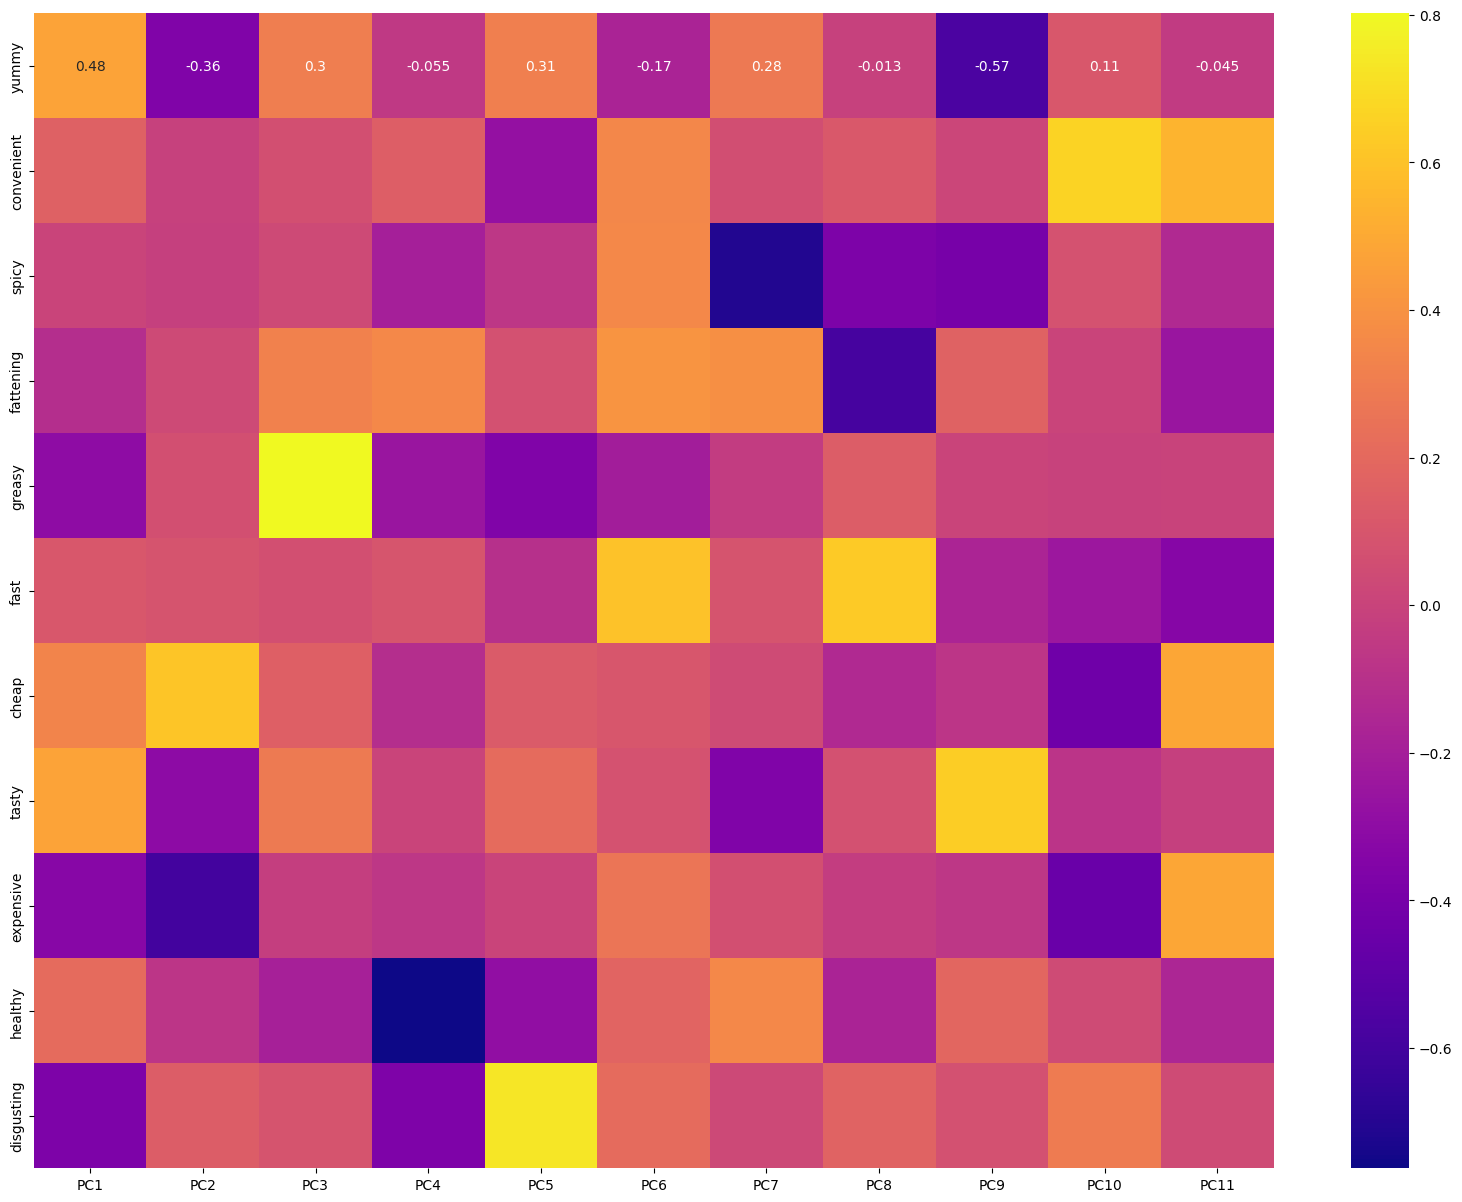

In [80]:

# correlation matrix plot for rot_df
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(rot_df, annot=True, cmap='plasma')
plt.show()

In [42]:
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


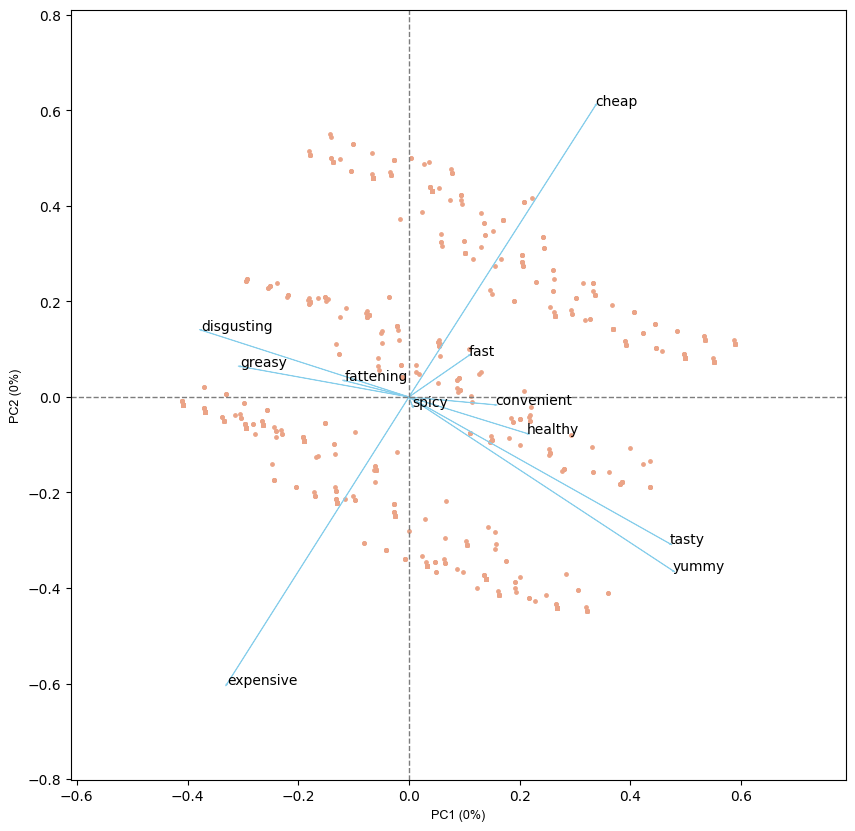

In [43]:
cluster.biplot(cscore=td_pca, loadings=-load, labels=df.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

## applying k-means clustering

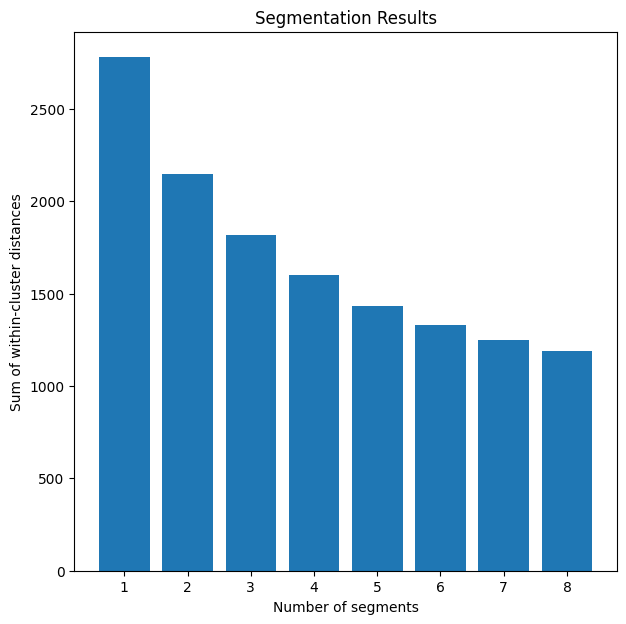

In [54]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
td_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(td)
    within_cluster_distances.append((kmeans.inertia_))
    td_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


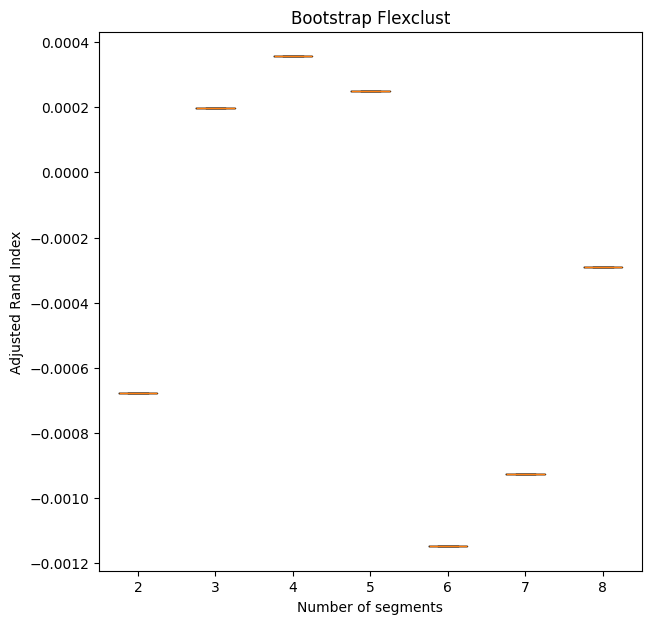

In [50]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(td.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(td.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()  





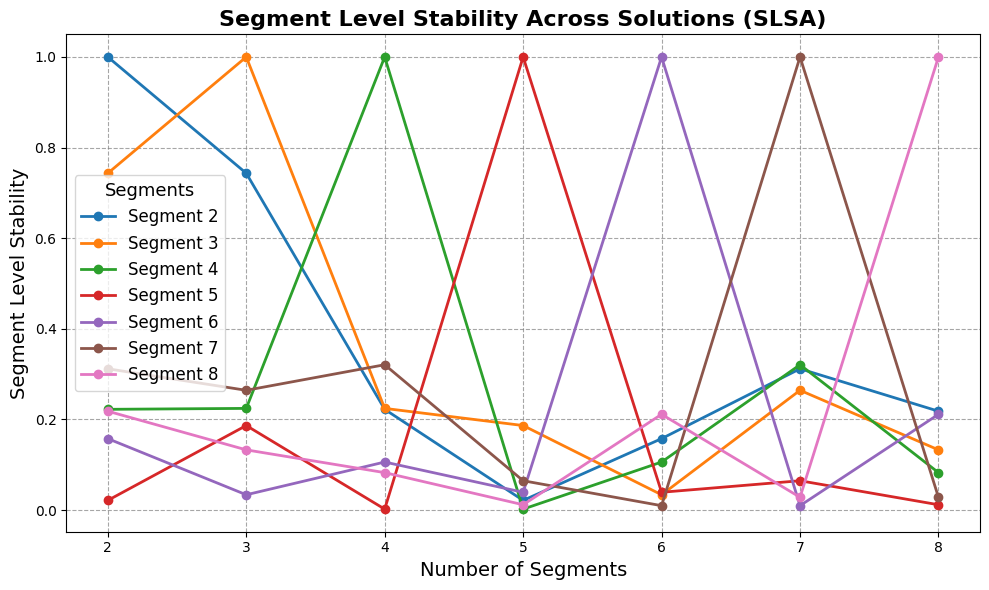

In [55]:
import numpy as np
import matplotlib.pyplot as plt

num_segments = range(2, 9)
segment_stability = [td_km28[str(s)].predict(td) for s in num_segments]

plt.figure(figsize=(10, 6))
for i, s in enumerate(num_segments):
    stability_scores = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability_scores, marker='o', linestyle='-', linewidth=2, markersize=6, label=f'Segment {s}')

plt.xlabel('Number of Segments', fontsize=14)
plt.ylabel('Segment Level Stability', fontsize=14)
plt.title('Segment Level Stability Across Solutions (SLSA)', fontsize=16, fontweight='bold')
plt.xticks(num_segments)
plt.legend(title='Segments', title_fontsize=13, fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


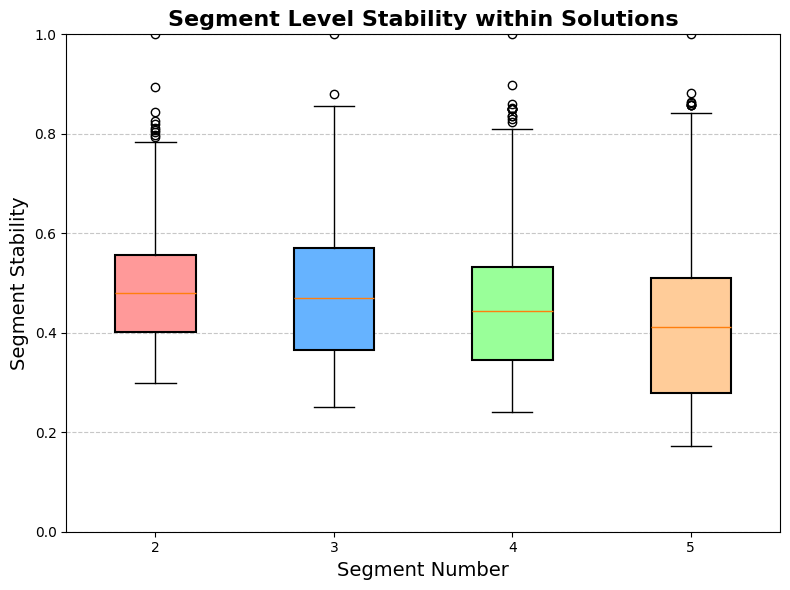

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def collect_segment_data(solutions, models, data):
    return {s: models[s].predict(data) for s in solutions}, {s: models[s].transform(data).min(axis=1) for s in solutions}

def normalize_similarities(similarities):
    return [s / np.max(s) for s in similarities.values()]

def plot_boxplot(stability_values, solutions):
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(stability_values, whis=1.5, patch_artist=True)
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_linewidth(1.5)

    plt.xlabel("Segment Number", fontsize=14)
    plt.ylabel("Segment Stability", fontsize=14)
    plt.xticks(range(1, len(solutions) + 1), solutions)
    plt.ylim(0, 1)
    plt.title("Segment Level Stability within Solutions", fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

segment_solutions = ["2", "3", "4", "5"]
segment_labels, segment_similarities = collect_segment_data(segment_solutions, td_km28, td)
segment_stability_values = normalize_similarities(segment_similarities)
plot_boxplot(segment_stability_values, segment_solutions)


In [83]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
td_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(td.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = td.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    td_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
td_m28 = pd.DataFrame(td_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(td_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     7       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    10       True  3   3 -1819.748502  3645.497005  3661.341162  3660.260456
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


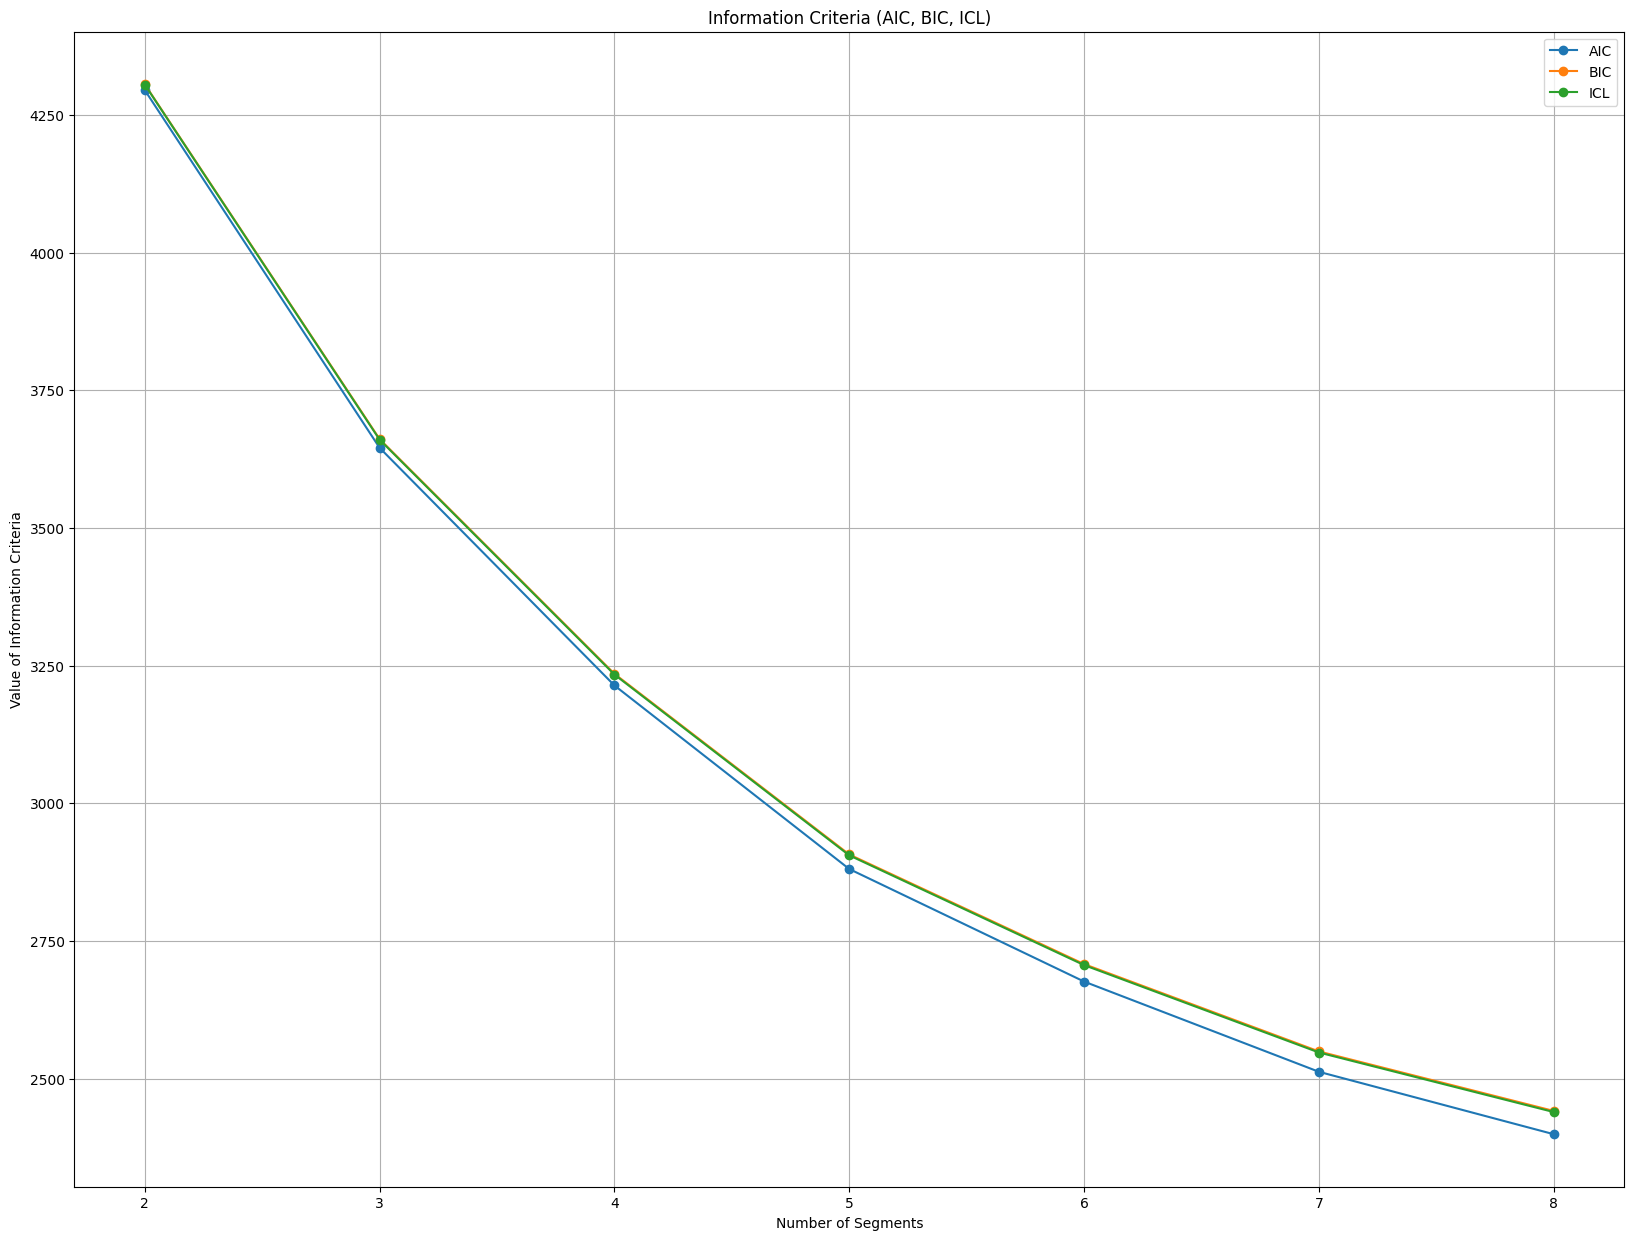

In [84]:
num_segments = td_m28["k"]
AIC_values = td_m28["AIC"]
BIC_values = td_m28["BIC"]
ICL_values = td_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [85]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(td)
kmeans_clusters = kmeans.predict(td)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(td)
gmm_clusters = gmm.predict(td)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

td_m4 = td[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(td_m4)
k4_m4_clusters = k4_m4.predict(td_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         86    5  266    7
1          0  211   24    5
2        466    0    5   62
3          0   38    2  276
kmeans   0   1   2   3
kmeans                
0       39  20  21  10
1       22  10  15   6
2       55  20  34  19
3       34  15  22   8


In [86]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(td)

log_likelihood_m4a = gmm_m4a.score(td)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(td)

log_likelihood_m4 = gmm_m4.score(td)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.068744792060572
Log-likelihood for MD.m4: 3.642746401176583


In [87]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1     58
-2     59
-4     71
-3     73
+5    143
-5    152
+1    152
+4    160
0     169
+2    187
+3    229
Name: count, dtype: int64


In [88]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [89]:
from patsy import dmatrices

independent_vars = df.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [90]:

from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
td_reg2 = model.fit(X, y)

print(td_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


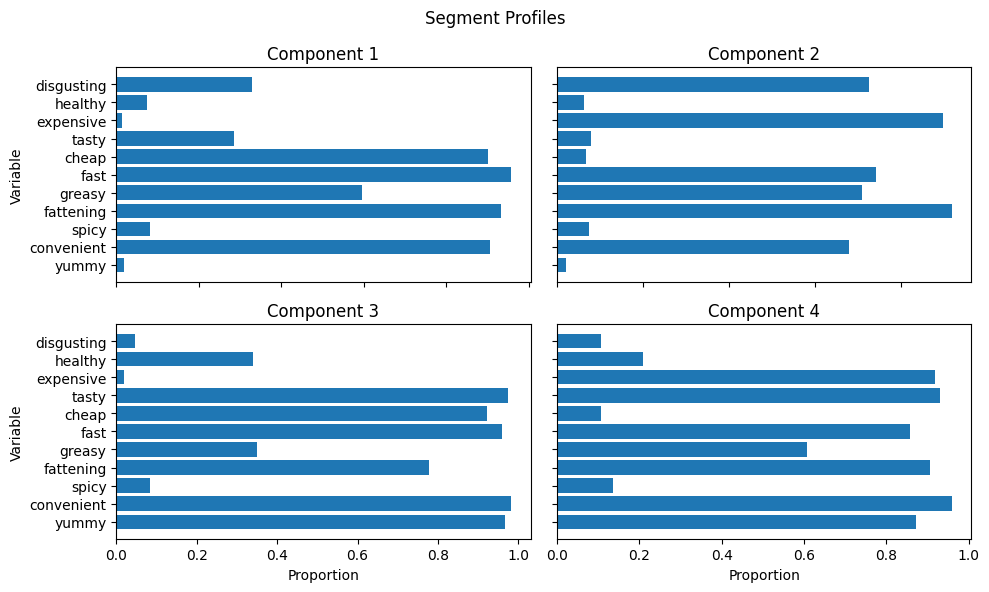

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = td_km28['4']

labels = kmeans.labels_

td_mean = td.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(td_mean.shape[1]), td_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(td_mean.shape[1]), td_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(td_mean.shape[1]), td_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(td_mean.shape[1]), td_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(td_mean.shape[1]))
    ax.set_yticklabels(td.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

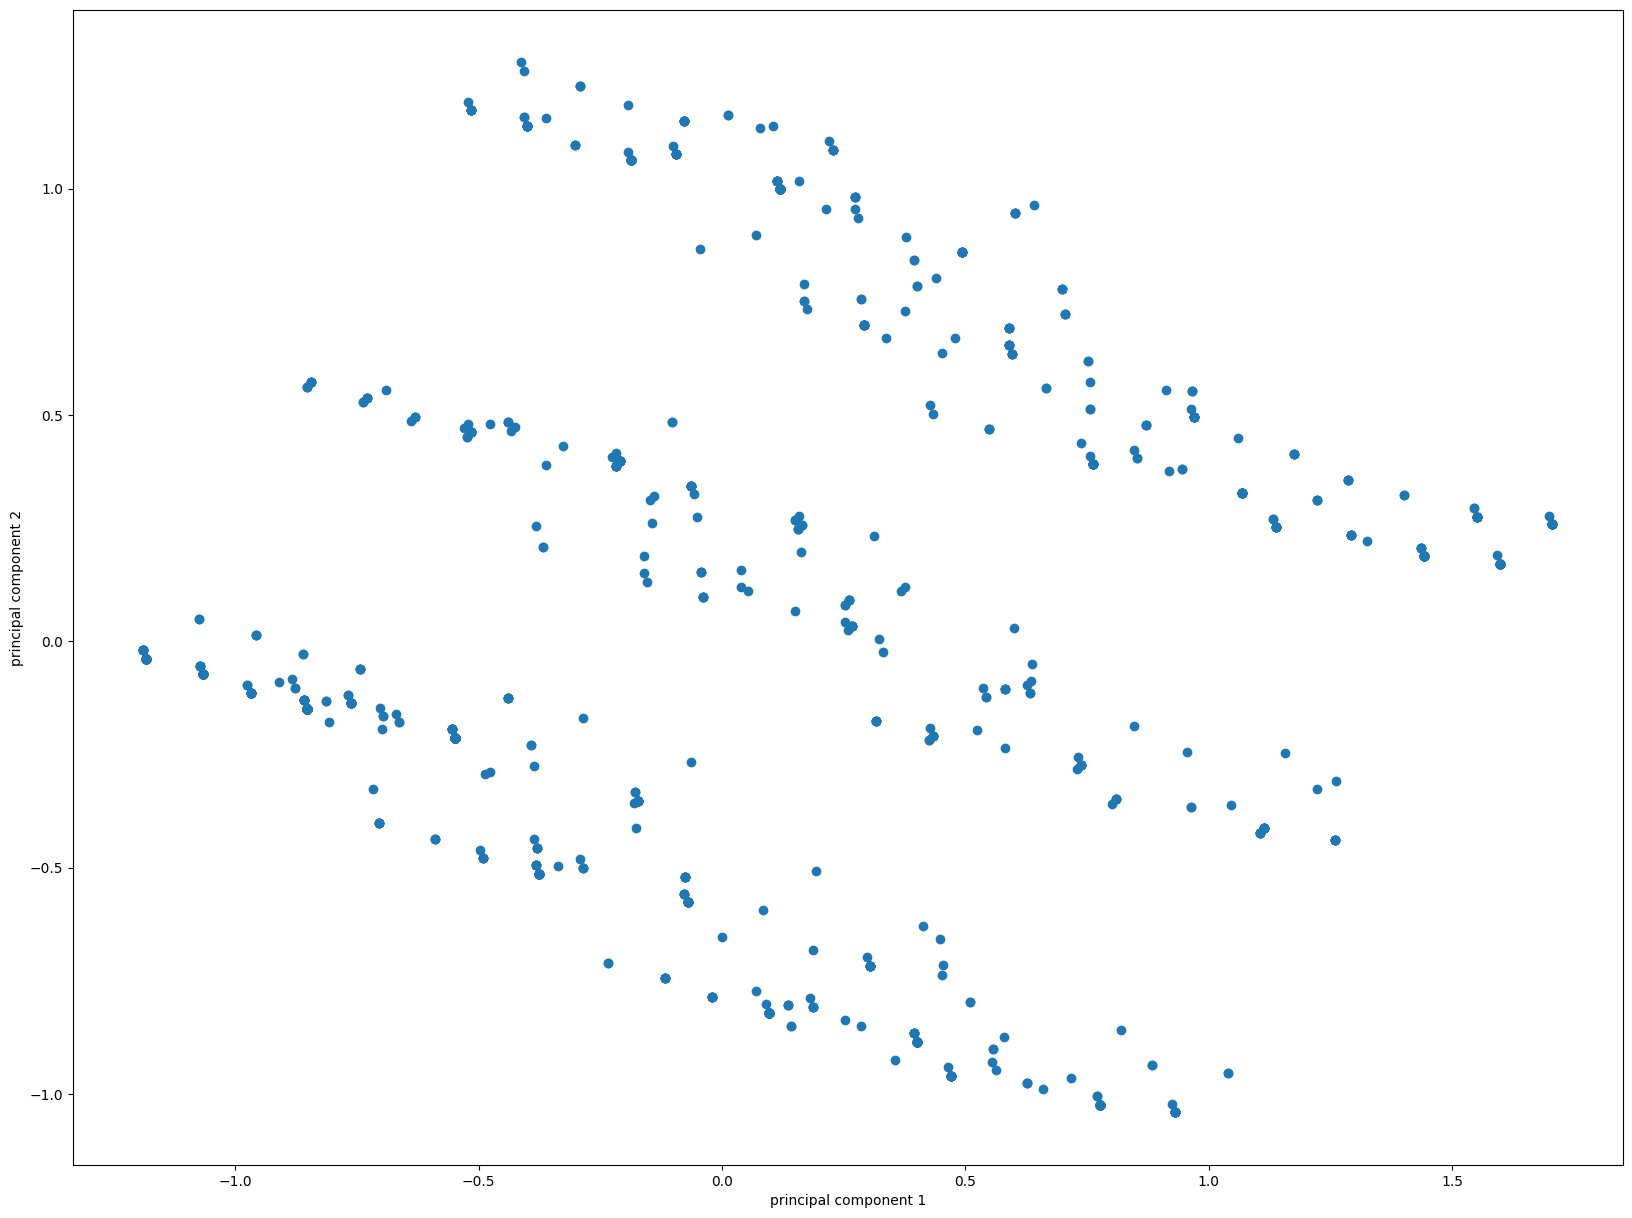

In [92]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(td)

pca = PCA(n_components=2)
td_pca = pca.fit_transform(td)

fig, ax = plt.subplots()

ax.scatter(td_pca[:, 0], td_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [93]:
data1=pd.read_csv("mcdonalds.csv")

Crosstab columns: Index(['+1', '+2', '+3', '+4', '-1', '-2', '-3', '-4', '0', 'I hate it!-5',
       'I love it!+5'],
      dtype='object', name='Like')


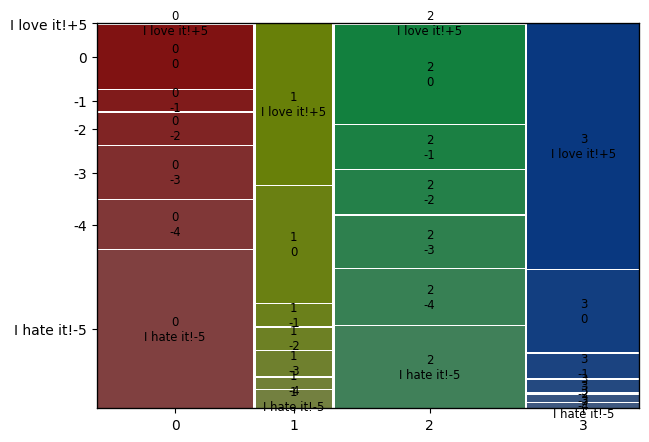

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Label encoding categorical variables
def label_encode_columns(df, columns):
    """Label encode categorical columns in a DataFrame."""
    for col in columns:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

# Categorical columns to be encoded
cat_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting']

# Apply encoding
data1 = label_encode_columns(data1, cat_cols)

# Select the 11 columns after encoding
df_eleven = data1[cat_cols]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_

# Create crosstab
crosstab = pd.crosstab(data1['cluster_num'], data1['Like'])

# Check actual column names of the crosstab
print("Crosstab columns:", crosstab.columns)

# Dynamically reordering the columns if they exist in crosstab
expected_columns = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'I love it!+5']
available_columns = [col for col in expected_columns if col in crosstab.columns]

# Reorder crosstab columns
crosstab = crosstab[available_columns]

# Plot mosaic
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()


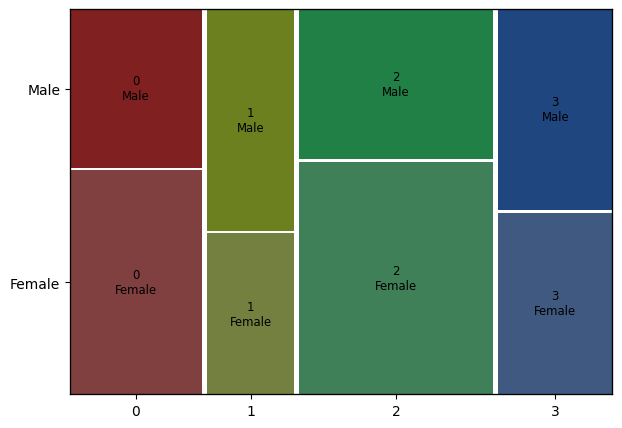

In [95]:

from statsmodels.graphics.mosaicplot import mosaic

td_k4=td_km28['4']
k4 = td_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

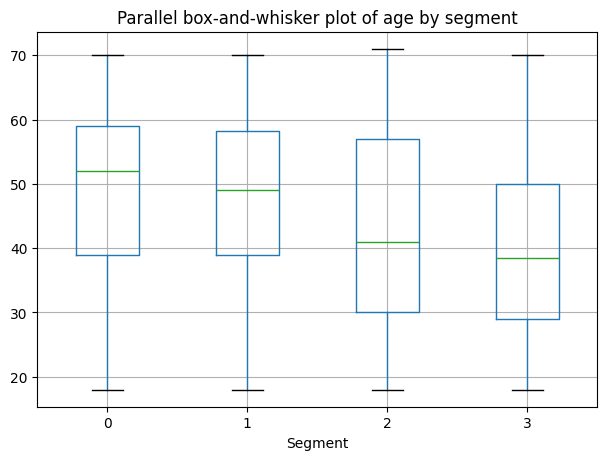

In [96]:
newdf = pd.DataFrame({'Segment': k4, 'Age': df['Age']})

newdf.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [97]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.691667
1,1,2.549206
2,2,2.717742
3,3,2.610266


In [98]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.741667
1,1,3.774603
2,2,5.083333
3,3,3.876426


In [99]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.579167
1,1,0.526984
2,2,0.416667
3,3,0.389734


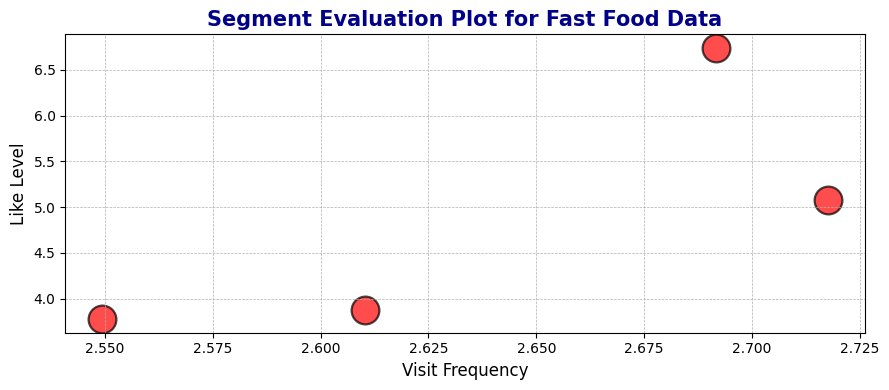

In [100]:
segment = pd.merge(Gender, Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="red", edgecolor="black", alpha=0.7)

plt.title("Segment Evaluation Plot for Fast Food Data", fontsize=15, fontweight='bold', color='darkblue')
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Like Level", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
